In [1]:
import imgaug as ia
from imgaug import augmenters as iaa
import imageio
import os

In [ ]:
#Utilizar uma dessas três variáveis para fazer alteração individual
rotate = iaa.Affine(rotate=(-40, 40)) # Girar imagem
gaussian_noise = iaa.AdditiveGaussianNoise(scale=(10, 60)) # adiciona ruido gaussiano
crop = iaa.Crop(percent=(0.1, 0.4)) # Cortar imagem

#Utilizar seq para implementar três transformações simultâneas
seq = iaa.Sequential([
    iaa.Affine(rotate=(-40,40)),
    iaa.AdditiveGaussianNoise(scale=(10, 60)),
    iaa.Crop(percent=(0.1, 0.4))
])

In [ ]:
#Criando um vetor com todas as imagens a serem Augmentadas
images = [imageio.imread(os.path.join(r"C:\TensorFlow-2.x-YOLOv3_Farmaco\custom_dataset\img",file)) for file in os.listdir(r'C:\TensorFlow-2.x-YOLOv3_Farmaco\custom_dataset\img') if '.jpg' in file]

In [ ]:
#Fazendo três transformações simultâneas
images_aug = seq(images=images)

In [ ]:
i = 0
for img in images_aug:
    imageio.imwrite(os.path.join(r"C:\TensorFlow-2.x-YOLOv3_Farmaco\custom_dataset\imagens",f'a7_img_aumento{i}.jpg'), img)
    i = i + 1

In [ ]:
#Fazendo apenas rotação
images_aug = rotate(images=images)

In [ ]:
for img in images_aug:
    imageio.imwrite(os.path.join(r"C:\TensorFlow-2.x-YOLOv3_Farmaco\custom_dataset\imagens",f'a8_img_aumento{i}.jpg'), img)
    i = i + 1

In [ ]:
#Adicionando apenas ruído
images_aug = gaussian_noise(images=images)

In [ ]:
for img in images_aug:
    imageio.imwrite(os.path.join(r"C:\TensorFlow-2.x-YOLOv3_Farmaco\custom_dataset\imagens",f'a9_img_augmento{i}.jpg'), img)
    i = i + 1

In [ ]:
#Adiciona ruído e rotação
images_aug = gaussian_noise(images=images)
images_aug = rotate(images=images_aug)

In [ ]:
for img in images_aug:
    imageio.imwrite(os.path.join(r"C:\TensorFlow-2.x-YOLOv3_Farmaco\custom_dataset\imagens",f'a10_img_augmento{i}.jpg'), img)
    i = i + 1

In [2]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Sat May 15 15:38:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data


In [6]:
%cd gdrive/My\ Drive/TensorFlow-2.x-YOLOv3/
!ls

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3
checkpoints	     detection_demo.py	model_data   train.py
custom_dataset	     IMAGES		__pycache__  yolov3
detection_custom.py  log		tools	     YOLOv3_project.ipynb


In [7]:
!pip install urllib3



In [8]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

In [9]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.4.1


'/device:GPU:0'

In [10]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov3 import Create_Yolov3
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

input_size = YOLO_INPUT_SIZE
Darknet_weights = YOLO_DARKNET_WEIGHTS

yolo = Create_Yolov3(input_size=input_size)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights
print(cv2.__version__)

4.1.2


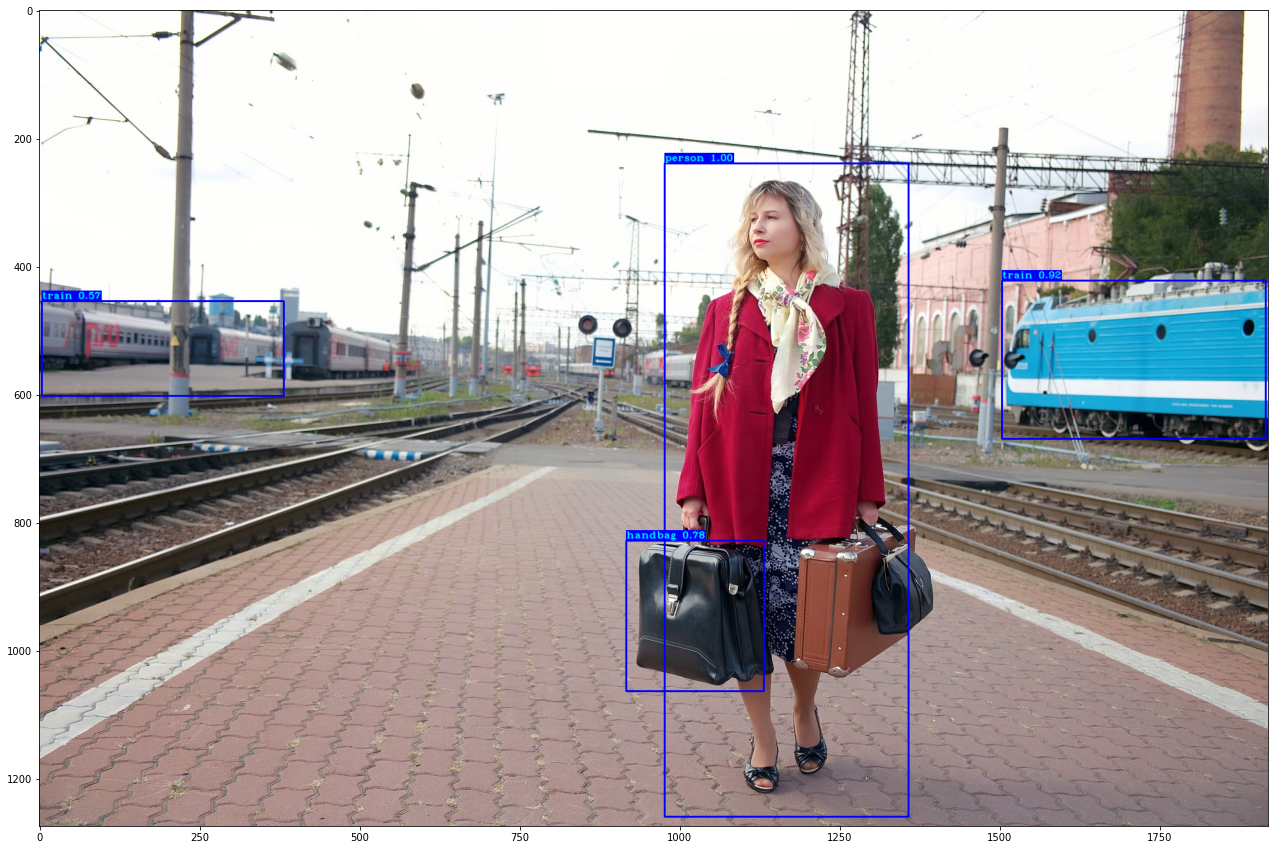

In [11]:
image_path   = "./IMAGES/img02.jpg"

image = detect_image(yolo, image_path, '', input_size=input_size, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

In [ ]:
!python tools/XML_to_YOLOv3.py

In [ ]:
from train import *
tf.keras.backend.clear_session()
main()

A saída de streaming foi truncada nas últimas 5000 linhas.
epoch: 9 step:   18/71, lr:0.000098, giou_loss:  22.45, conf_loss:  46.42, prob_loss:   7.01, total_loss:  75.88
epoch: 9 step:   19/71, lr:0.000098, giou_loss:  17.84, conf_loss:  39.86, prob_loss:   9.16, total_loss:  66.85
epoch: 9 step:   20/71, lr:0.000098, giou_loss:  22.76, conf_loss:  41.47, prob_loss:  31.09, total_loss:  95.32
epoch: 9 step:   21/71, lr:0.000098, giou_loss:  18.81, conf_loss:  38.23, prob_loss:   6.17, total_loss:  63.22
epoch: 9 step:   22/71, lr:0.000098, giou_loss:  22.35, conf_loss:  41.00, prob_loss:  11.16, total_loss:  74.51
epoch: 9 step:   23/71, lr:0.000098, giou_loss:  20.35, conf_loss:  40.36, prob_loss:   6.49, total_loss:  67.20
epoch: 9 step:   24/71, lr:0.000098, giou_loss:  23.37, conf_loss:  46.68, prob_loss:  15.11, total_loss:  85.16
epoch: 9 step:   25/71, lr:0.000098, giou_loss:  15.84, conf_loss:  37.82, prob_loss:   7.69, total_loss:  61.35
epoch: 9 step:   26/71, lr:0.000098, 

In [41]:
yolo = Create_Yolov3(input_size=input_size, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights

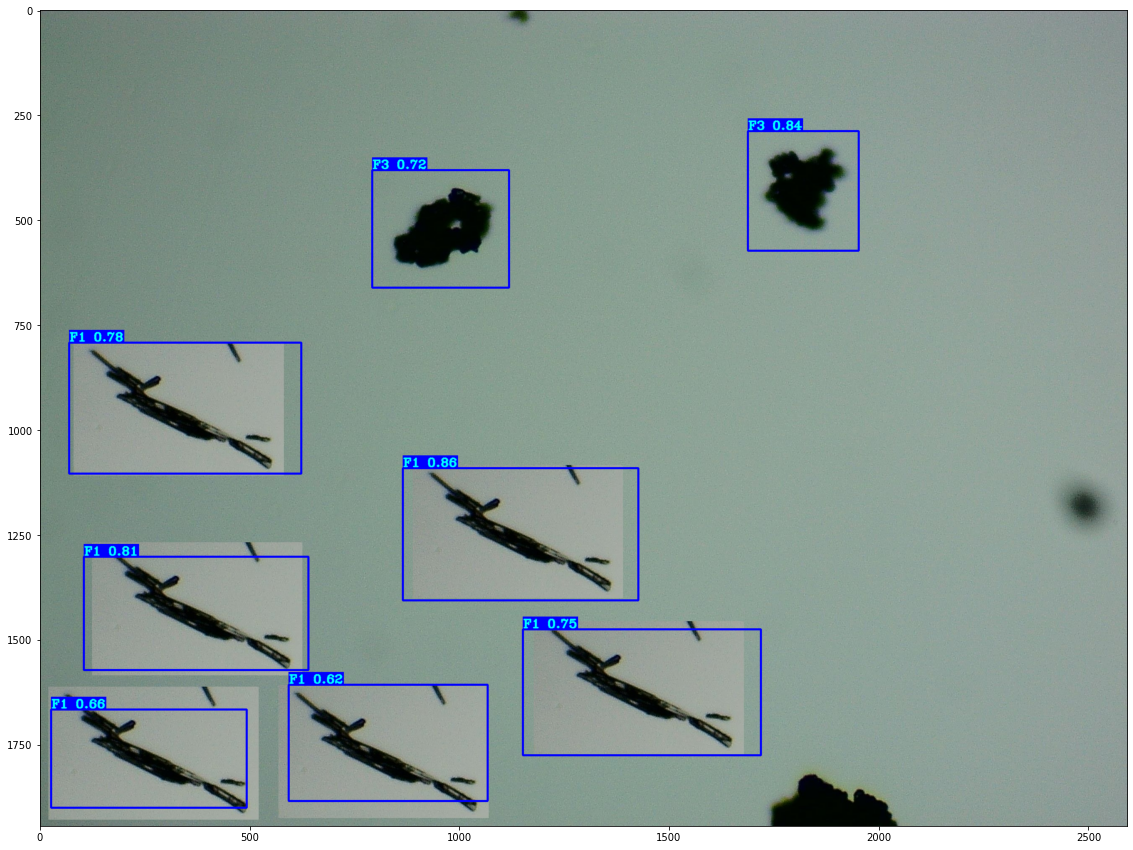

In [42]:
image_path   = "./IMAGES/Carba_F3_41_au.jpg"
image = detect_image(yolo, image_path, "", input_size=input_size, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)
plt.savefig('IMAGES/Carba_F3_41_au_detect.jpg')

In [ ]:
yolo = Create_Yolov3(input_size=input_size, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints_b/yolov3_custom") # use keras weights

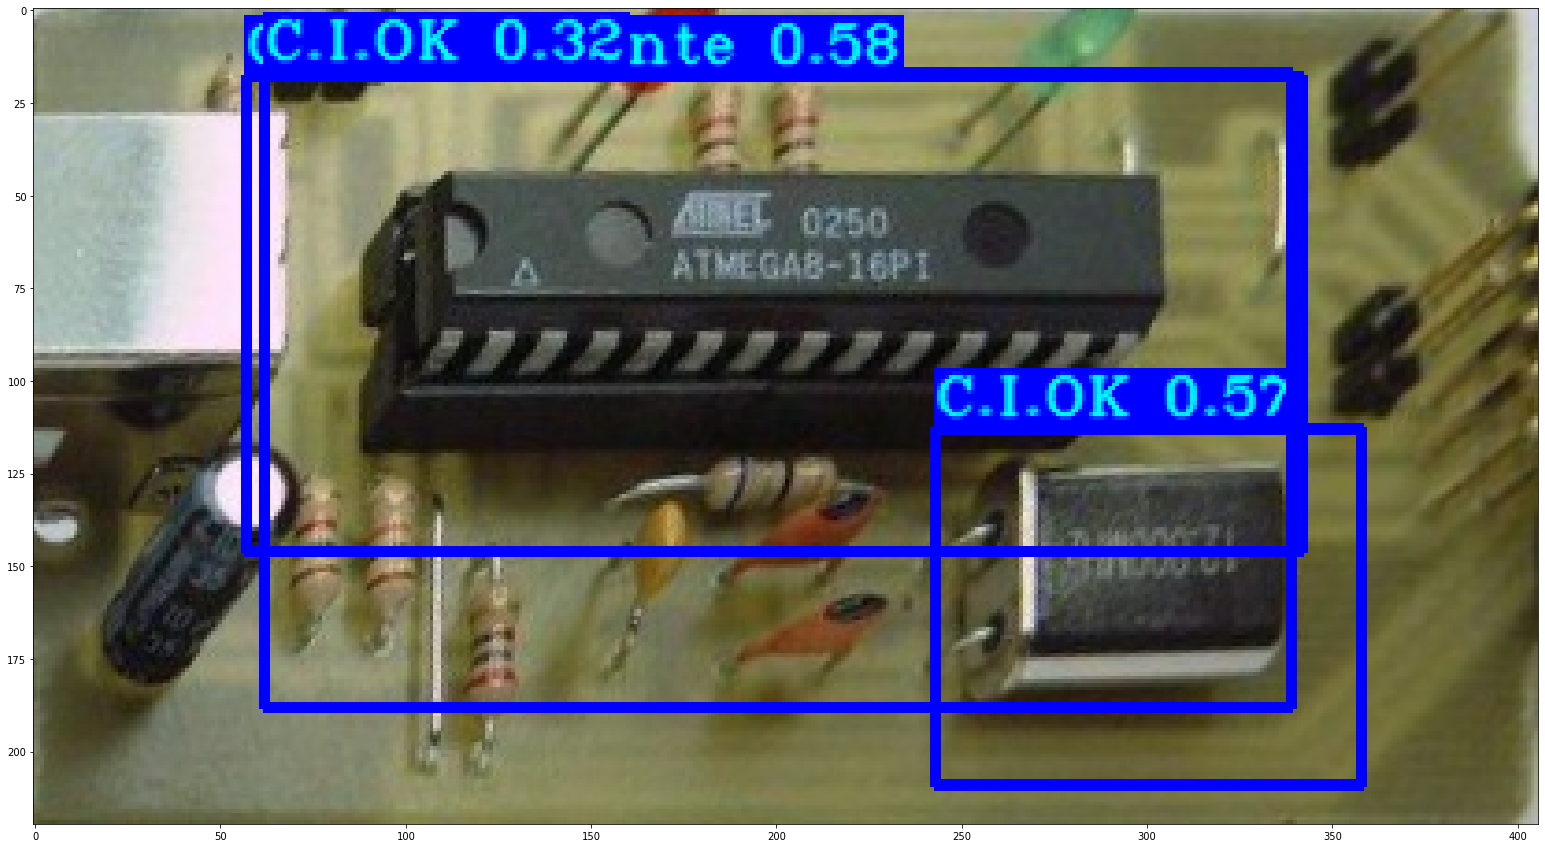

In [ ]:
image_path   = "./IMAGES/pic01_trans.jpg"
image = detect_image(yolo, image_path, "", input_size=input_size, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)
plt.savefig('IMAGES/pic01_02.jpg')

In [ ]:
yolo = Create_Yolov3(input_size=input_size, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights

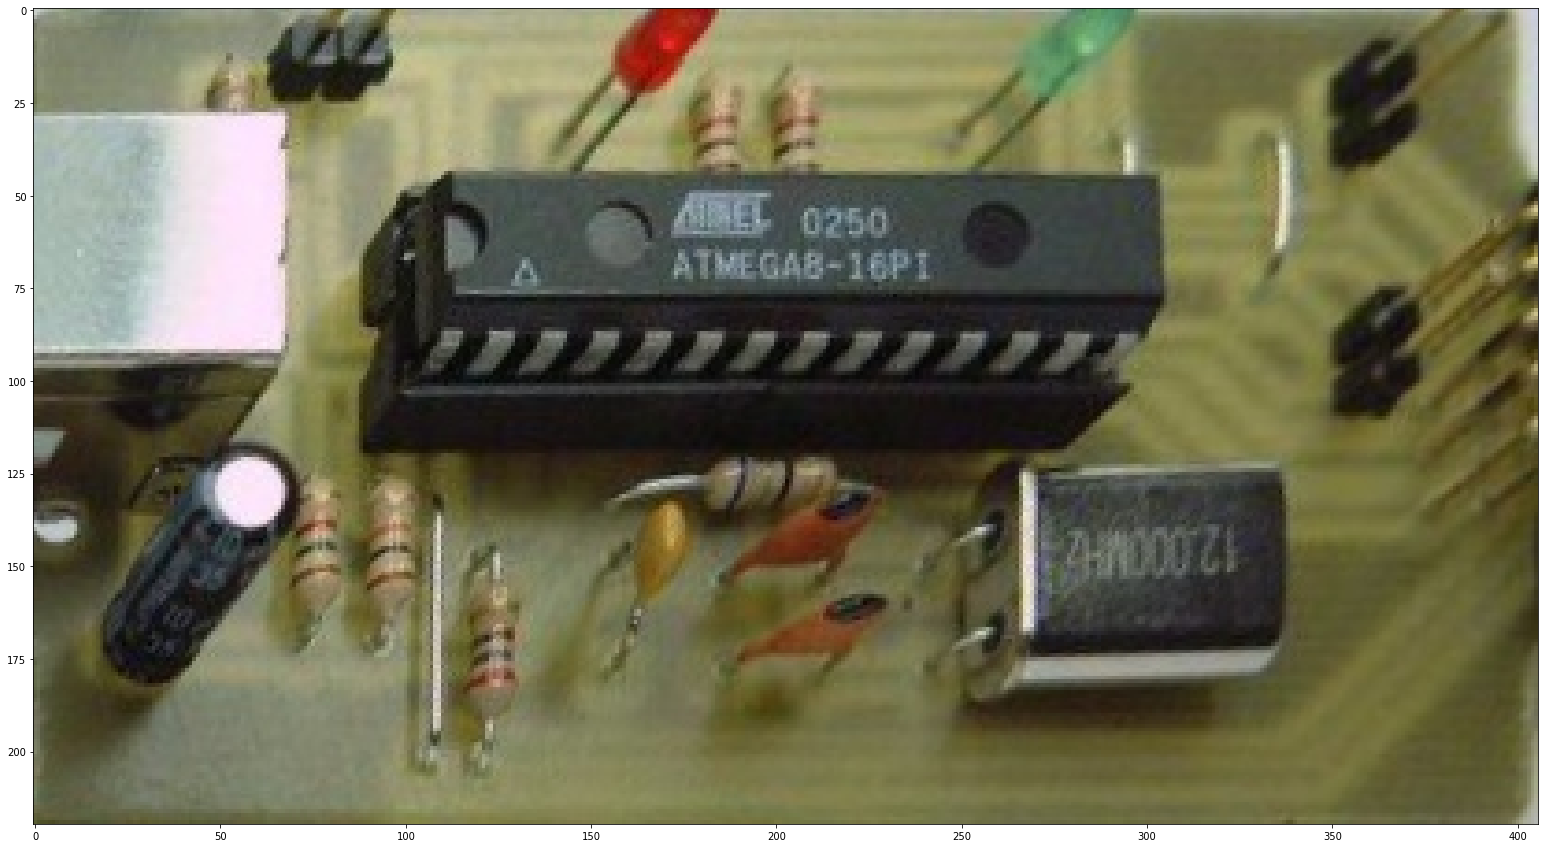

In [ ]:
image_path   = "./IMAGES/pic01_trans.jpg"
image = detect_image(yolo, image_path, "", input_size=input_size, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)
plt.savefig('IMAGES/pic01_02.jpg')